In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform

# Define function f(x)
def f(x):
    return 0.5 * np.exp(-np.abs(x))

# Define  log of f(x)
def log_f(x):
    return np.log(0.5) - np.abs(x)

In [2]:
# Initialize parameters
x0 = 0
N = 10000
s = 1
x = np.zeros(N+1)
x[0] = x0

# Metropolis-Hastings algorithm
for i in range(1, N+1):
    x_proposed = norm.rvs(loc=x[i-1], scale=s)
    log_r = log_f(x_proposed) - log_f(x[i-1])
    u = np.log(uniform.rvs())
    if u < log_r:
        x[i] = x_proposed
    else:
        x[i] = x[i-1]

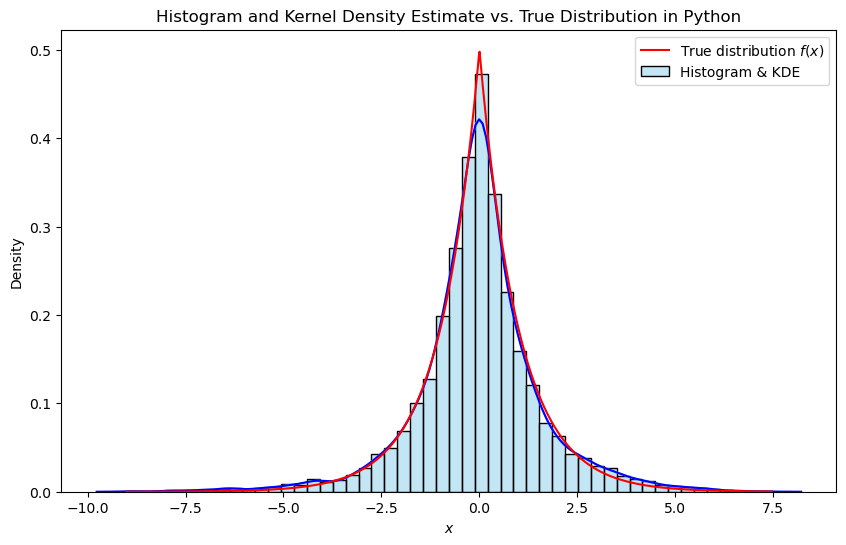

Sample Mean: -0.02585111488375569
Sample Standard Deviation: 1.5907356012269236


In [5]:
# Construct a histogram and a kernel density plot
plt.figure(figsize=(10, 6))
sns.histplot(x[1:], bins=50, stat='density', kde=True, color='skyblue', label='Histogram & KDE')
sns.kdeplot(x[1:], color='blue', linewidth=1.5)  # Adjust linewidth for size
x_values = np.linspace(min(x), max(x), 1000)
plt.plot(x_values, f(x_values), 'r', label='True distribution $f(x)$')
plt.legend()
plt.title('Histogram and Kernel Density Estimate vs. True Distribution in Python')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.show()


# Calculate the sample mean and standard deviation
sample_mean = np.mean(x[1:])
sample_std = np.std(x[1:])
print('Sample Mean:', sample_mean)
print('Sample Standard Deviation:', sample_std)

In [4]:
N = 2000
s_values = np.linspace(0.001, 1, 1000)
J = 4
x0 = 0

[1730.8675681408915, 199.6818103435649, 53.54582532771861, 75.18913456360116, 28.39517157516011, 39.67099390555266, 64.7430278435493, 34.3599248444916, 24.799847533810865, 7.574614606851454, 18.595626017907243, 6.481037126783713, 26.51190117979186, 15.543139206848075, 28.819013532107686, 10.240675359879422, 26.349937896861793, 22.885136940822377, 12.584170069473531, 9.334388208960595, 7.70005586605103, 7.617857507604133, 2.7046836570278963, 15.77680184593494, 7.150498531681845, 8.895150601111041, 6.2523146005488694, 17.693266680422145, 2.417947415408508, 7.055513867733913, 5.544869258152295, 7.6379085578096815, 12.648487595624589, 4.615747991746161, 6.943444249275782, 10.064383093135568, 6.23866337992221, 7.176806721791776, 4.676363532281481, 11.265241290719787, 9.063175250821388, 5.209219436166294, 8.087357655879476, 5.4808391758674855, 6.606695651425867, 3.399811207597198, 4.661925786145186, 8.836392459404749, 7.821424911784424, 7.260930097213569, 5.037773519580972, 7.89434887748273,

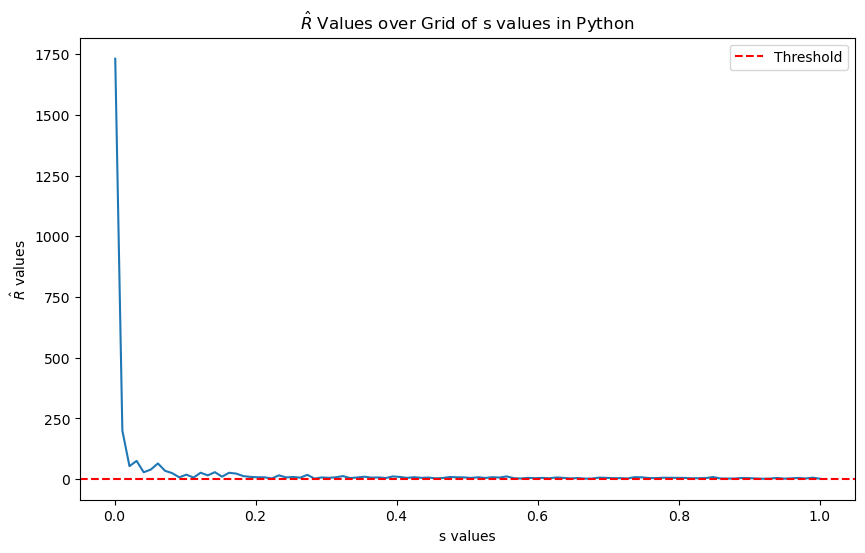

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Replace this with your actual probability density function
    return 0.5 * np.exp(-np.abs(x))

def random_walk_metropolis(x0, N, s):
    samples = np.zeros(N)
    samples[0] = x0
    for i in range(1, N):
        x_star = np.random.normal(loc=samples[i-1], scale=s)
        r = f(x_star) / f(samples[i-1])
        u = np.random.uniform(0, 1)
        if np.log(u) < np.log(r):
            samples[i] = x_star
        else:
            samples[i] = samples[i-1]
    return samples

def calculate_r_hat(N, J, s_values):
    R_hat_values = []
    for s in s_values:
        M_j_values = []
        V_j_values = []
        for j in range(1, J+1):  # j starts from 1 as per your request
            x0 = np.random.normal(0, 1)  # Different initial value for each chain
            samples = random_walk_metropolis(x0, N, s)
            M_j = np.mean(samples)
            V_j = np.var(samples, ddof=1)
            M_j_values.append(M_j)
            V_j_values.append(V_j)
        W = np.mean(V_j_values)
        M = np.mean(M_j_values)
        B = np.mean((np.array(M_j_values) - M)**2) * N
        r_hat = np.sqrt((B/W + 1) * (N-1)/N + (W/N))
        R_hat_values.append(r_hat)
    return R_hat_values

# Parameters for the Metropolis-Hastings algorithm
N = 2000  # Number of samples to generate in each chain
J = 4  # Number of chains
s_values = np.linspace(0.001, 1, 100)  # Scale parameter values

# Calculate R_hat for each scale value
R_hat_values = calculate_r_hat(N, J, s_values)
print(R_hat_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(s_values, R_hat_values)
plt.xlabel('s values')
plt.ylabel(r'$\hat{R}$ values')
plt.title(r'$\hat{R}$ Values over Grid of s values in Python')
plt.axhline(y=1.05, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()
